<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(_0_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.8_n250.csv',
 'data_add_delta_-0.8_n120.csv',
 'data_add_delta_-0.8_n60.csv',
 'data_add_delta_-0.8_n30.csv',
 'data_add_delta_-0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,29.879096,42.245949,80.350194,48.317964,0.012841,210.806043,210.817856,-0.011813
1,0.0,1.0,30.209579,72.788062,75.816130,72.304703,0.051473,261.169947,261.125181,0.044766
2,0.0,2.0,85.681034,79.874387,96.040127,52.830206,-0.063213,324.362541,324.428075,-0.065535
3,0.0,3.0,63.563745,36.177303,63.414513,72.444255,0.185968,245.785783,245.577597,0.208186
4,0.0,4.0,93.660496,59.700695,35.445430,59.188812,0.221941,258.217374,257.947400,0.269974
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,94.233201,76.286355,88.874250,67.151934,0.015440,336.561179,336.542638,0.018541
249996,999.0,246.0,72.803416,66.391249,32.939480,25.987839,-0.149952,207.972032,208.173399,-0.201367
249997,999.0,247.0,28.929644,31.855524,45.721717,22.753412,0.211729,139.472026,139.246814,0.225212
249998,999.0,248.0,27.949270,82.935779,73.123136,55.620447,-0.036334,249.592297,249.598672,-0.006375


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,29.879096,42.245949,80.350194,48.317964,0.012841,210.806043,210.817856,-0.011813
1,0.0,1.0,30.209579,72.788062,75.816130,72.304703,0.051473,261.169947,261.125181,0.044766
2,0.0,2.0,85.681034,79.874387,96.040127,52.830206,-0.063213,324.362541,324.428075,-0.065535
3,0.0,3.0,63.563745,36.177303,63.414513,72.444255,0.185968,245.785783,245.577597,0.208186
4,0.0,4.0,93.660496,59.700695,35.445430,59.188812,0.221941,258.217374,257.947400,0.269974
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,94.233201,76.286355,88.874250,67.151934,0.015440,336.561179,336.542638,0.018541
249996,999.0,246.0,72.803416,66.391249,32.939480,25.987839,-0.149952,207.972032,208.173399,-0.201367
249997,999.0,247.0,28.929644,31.855524,45.721717,22.753412,0.211729,139.472026,139.246814,0.225212
249998,999.0,248.0,27.949270,82.935779,73.123136,55.620447,-0.036334,249.592297,249.598672,-0.006375


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    29.879096  42.245949  80.350194  48.317964  0.012841  210.806043   
      1.0    30.209579  72.788062  75.816130  72.304703  0.051473  261.169947   
      2.0    85.681034  79.874387  96.040127  52.830206 -0.063213  324.362541   
      3.0    63.563745  36.177303  63.414513  72.444255  0.185968  245.785783   
      4.0    93.660496  59.700695  35.445430  59.188812  0.221941  258.217374   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  94.233201  76.286355  88.874250  67.151934  0.015440  336.561179   
      246.0  72.803416  66.391249  32.939480  25.987839 -0.149952  207.972032   
      247.0  28.929644  31.855524  45.721717  22.753412  0.211729  139.472026   
      248.0  27.949270  82.935779  73.123136  55.620447 -0.036334  249.592297   
      249.0  27.663269  48.509999  33.789863  60.054601  0.000926  180.018658   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    210.817856 -0.011813  
      1.0    261.125181  0.044766  
      2.0    324.428075 -0.065535  
      3.0    245.577597  0.208186  
      4.0    257.947400  0.269974  
...                 ...       ...  
999.0 245.0  336.542638  0.018541  
      246.0  208.173399 -0.201367  
      247.0  139.246814  0.225212  
      248.0  249.598672 -0.006375  
      249.0  180.004087  0.014570  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    29.879096  42.245949  80.350194  48.317964  0.012841  210.806043   
      1.0    30.209579  72.788062  75.816130  72.304703  0.051473  261.169947   
      2.0    85.681034  79.874387  96.040127  52.830206 -0.063213  324.362541   
      3.0    63.563745  36.177303  63.414513  72.444255  0.185968  245.785783   
      4.0    93.660496  59.700695  35.445430  59.188812  0.221941  258.217374   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  94.233201  76.286355  88.874250  67.151934  0.015440  336.561179   
      246.0  72.803416  66.391249  32.939480  25.987839 -0.149952  207.972032   
      247.0  28.929644  31.855524  45.721717  22.753412  0.211729  139.472026   
      248.0  27.949270  82.935779  73.123136  55.620447 -0.036334  249.592297   
      249.0  27.663269  48.509999  33.789863  60.054601  0.000926  180.018658   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    210.817856 -0.011813  
      1.0    261.125181  0.044766  
      2.0    324.428075 -0.065535  
      3.0    245.577597  0.208186  
      4.0    257.947400  0.269974  
...                 ...       ...  
999.0 245.0  336.542638  0.018541  
      246.0  208.173399 -0.201367  
      247.0  139.246814  0.225212  
      248.0  249.598672 -0.006375  
      249.0  180.004087  0.014570  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,29.879096,42.245949,80.350194,48.317964,0.012841,210.806043,210.817856,-0.011813
1,0.0,1.0,30.209579,72.788062,75.816130,72.304703,0.051473,261.169947,261.125181,0.044766
2,0.0,2.0,85.681034,79.874387,96.040127,52.830206,-0.063213,324.362541,324.428075,-0.065535
3,0.0,3.0,63.563745,36.177303,63.414513,72.444255,0.185968,245.785783,245.577597,0.208186
4,0.0,4.0,93.660496,59.700695,35.445430,59.188812,0.221941,258.217374,257.947400,0.269974
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,94.233201,76.286355,88.874250,67.151934,0.015440,336.561179,336.542638,0.018541
249996,999.0,246.0,72.803416,66.391249,32.939480,25.987839,-0.149952,207.972032,208.173399,-0.201367
249997,999.0,247.0,28.929644,31.855524,45.721717,22.753412,0.211729,139.472026,139.246814,0.225212
249998,999.0,248.0,27.949270,82.935779,73.123136,55.620447,-0.036334,249.592297,249.598672,-0.006375


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    29.879096  42.245949  80.350194  48.317964  0.012841  210.806043   
      1.0    30.209579  72.788062  75.816130  72.304703  0.051473  261.169947   
      2.0    85.681034  79.874387  96.040127  52.830206 -0.063213  324.362541   
      3.0    63.563745  36.177303  63.414513  72.444255  0.185968  245.785783   
      4.0    93.660496  59.700695  35.445430  59.188812  0.221941  258.217374   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  94.233201  76.286355  88.874250  67.151934  0.015440  336.561179   
      246.0  72.803416  66.391249  32.939480  25.987839 -0.149952  207.972032   
      247.0  28.929644  31.855524  45.721717  22.753412  0.211729  139.472026   
      248.0  27.949270  82.935779  73.123136  55.620447 -0.036334  249.592297   
      249.0  27.663269  48.509999  33.789863  60.054601  0.000926  180.018658   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    210.817856 -0.011813  
      1.0    261.125181  0.044766  
      2.0    324.428075 -0.065535  
      3.0    245.577597  0.208186  
      4.0    257.947400  0.269974  
...                 ...       ...  
999.0 245.0  336.542638  0.018541  
      246.0  208.173399 -0.201367  
      247.0  139.246814  0.225212  
      248.0  249.598672 -0.006375  
      249.0  180.004087  0.014570  

[250000 rows x 8 columns]

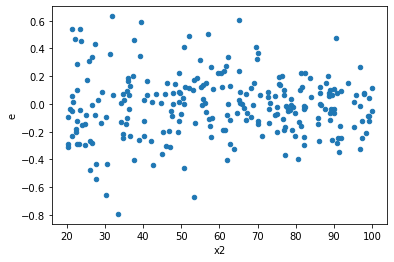

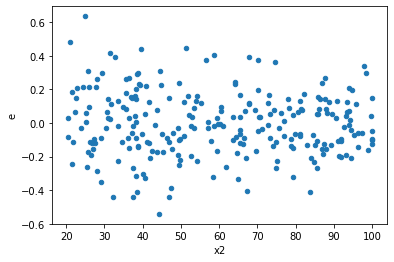

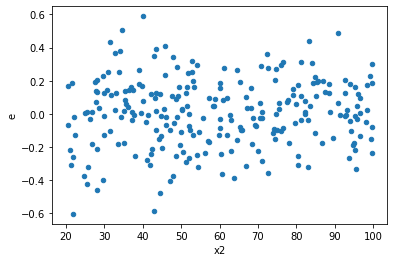

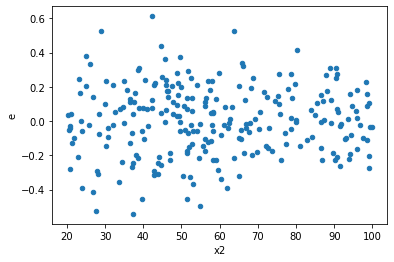

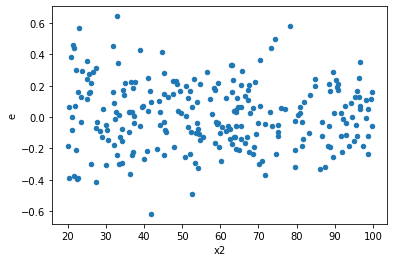

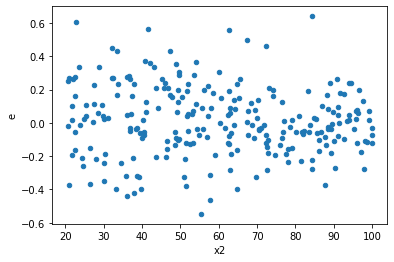

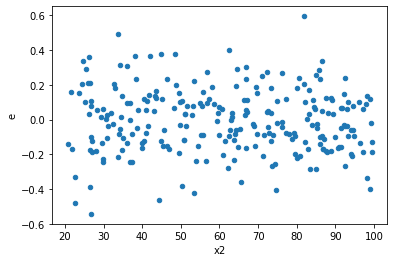

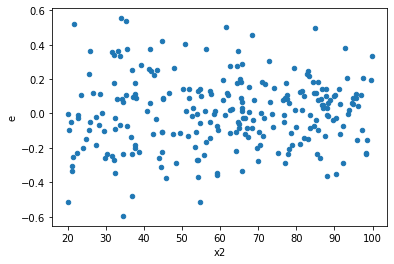

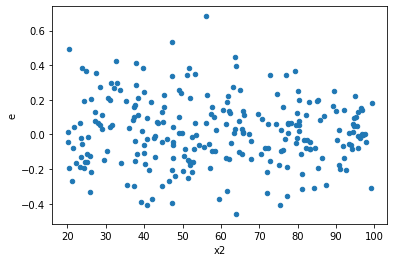

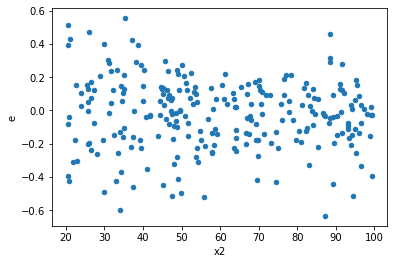

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,7.166269346862984,2.587609940881496,0.07464863902982276,0.02695427021751558,0.3610818705850367,1.0831471052952345e-06,Reject001=0 : Heteroscedasticity
1.0,96.0,96.0,4.596678890299676,2.5473803966368402,0.047882071773954954,0.026535212464967085,0.5541784530593492,0.004187089260082387,Reject001=0 : Heteroscedasticity
2.0,96.0,96.0,5.409108592540127,3.0556002310755574,0.05634488117229299,0.03182916907370372,0.5648990362829158,0.0055713398322241306,Reject001=0 : Heteroscedasticity
3.0,96.0,96.0,4.566595354289925,2.790648785809138,0.047568701607186716,0.029069258185511856,0.6111005178480644,0.01664409835099847,Reject001=1 : Homoscedasticity
4.0,96.0,96.0,5.599620452345313,3.515193278964793,0.05832937971193034,0.03661659665588326,0.6277556325255061,0.023517058413964734,Reject001=1 : Homoscedasticity
5.0,96.0,96.0,5.452791921057256,2.654425134880581,0.05679991584434641,0.027650261821672722,0.48680110543552674,0.0004999424791570097,Reject001=0 : Heteroscedasticity
6.0,96.0,96.0,4.138305561017515,2.8435016325835067,0.04310734959393245,0.02961980867274486,0.6871173698165378,0.06751368937669118,Reject001=1 : Homoscedasticity
7.0,96.0,96.0,5.863751807764959,2.786852938755042,0.06108074799755165,0.029029718112031686,0.4752678882255225,0.00032536599729556204,Reject001=0 : Heteroscedasticity
8.0,96.0,96.0,4.288435047354852,2.3364888696243113,0.04467119840994638,0.024338425725253243,0.5448348509010251,0.003229538949307673,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    782
Reject001=1 : Homoscedasticity      218
Name: Result_test, dtype: int64